In [9]:
import sys
sys.path.append("../../../")

## 数据

In [10]:
from pylib.utils.functions_for_regression import lin_data, plot_scatter
import matplotlib.pyplot as plt
import numpy as np

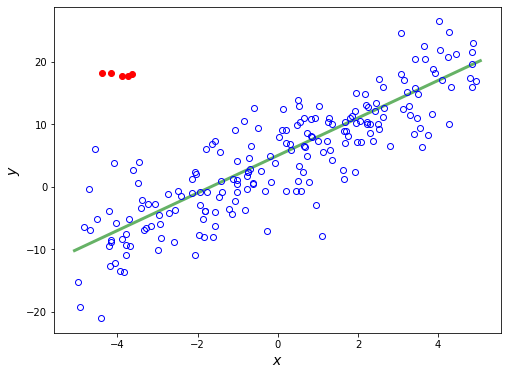

In [17]:
x_orig, y_orig, _, f_truth, outliers = lin_data(200, has_outlier=True)

plt.figure(figsize=(8, 6))
plot_scatter(x_orig, y_orig, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
plt.show()

In [19]:
x_plus_ol = np.r_[x_orig, outliers[:, 0].reshape(-1, 1)]
X = np.c_[np.ones(len(x_plus_ol)), x_plus_ol]
y = np.r_[y_orig, outliers[:, 1]]

In [20]:
objective_func = lambda W: 1. / 2 * W.T @ W

In [21]:
constraint = lambda W: [y[i] * (X[i] @ W) - 1 for i in range(len(y))]

In [22]:
from scipy import optimize
from scipy.optimize import NonlinearConstraint

In [23]:
nonlinear_contraints = NonlinearConstraint(constraint, 0, np.inf)

In [32]:
results = optimize.minimize(objective_func, x0=np.array([-10.0, 10.0]), constraints=[nonlinear_contraints])
results

     fun: 45.73697604831645
     jac: array([-6.7447772 ,  6.78099823])
 message: 'Positive directional derivative for linesearch'
    nfev: 52
     nit: 12
    njev: 8
  status: 8
 success: False
       x: array([-6.74477745,  6.78099766])

In [25]:
W_values = results.x

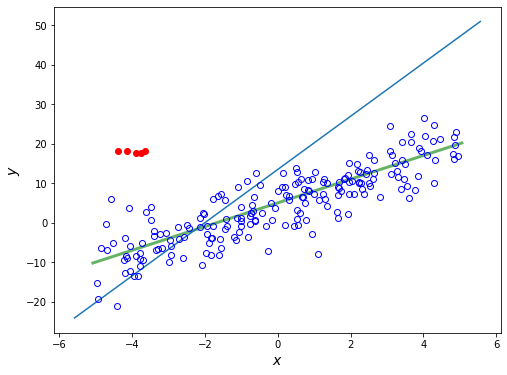

In [26]:
plt.figure(figsize=(8, 6))
plot_scatter(x_orig, y_orig, f=f_truth)
plt.scatter(outliers[:, 0], outliers[:, 1], color='r')
xn = np.linspace(plt.xlim()[0], plt.xlim()[1], 100)
yn = W_values[0] + W_values[1] * xn
plt.plot(xn, yn)
plt.show()

In [33]:
import sympy
sympy.init_printing()